# Classify images
## fashion MNIST
source [site](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape # same dimension with MNIST but it's fashion images

(60000, 28, 28)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

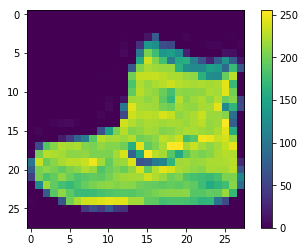

In [5]:
plt.figure() # make image holder
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show() # value are 0~255

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0 # scaling 0~1

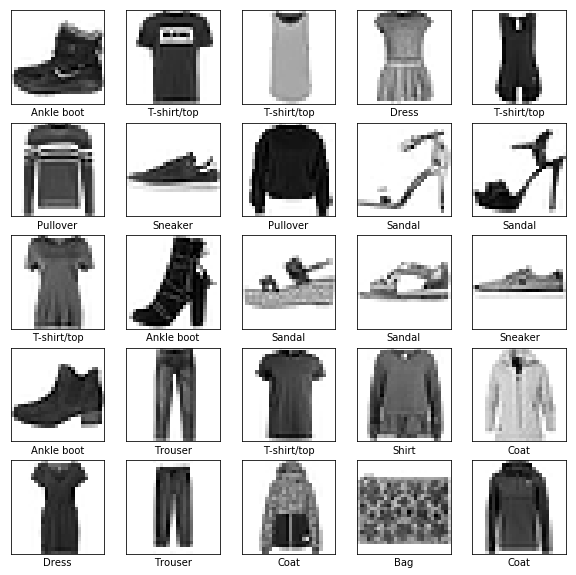

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
class MyModel(keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape=(28,28))
        self.d1 = keras.layers.Dense(128, activation='relu')
        self.d2 = keras.layers.Dense(10, activation='softmax')
    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)
# build modes with class
model = MyModel()

In [9]:
loss_object = keras.losses.SparseCategoricalCrossentropy()

optimizer = keras.optimizers.Adam()

In [10]:
train_loss = keras.metrics.Mean(name='train_loss')
train_accuracy = keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
# for evaluation metrix
test_loss = keras.metrics.Mean(name='test_loss')
test_accuracy = keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [11]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions) 
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss) # for evaluation metric
    train_accuracy(labels, predictions) # # for evaluation metric

In [12]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)
# note that there's no gradients or optimizer function, 
# just predictions and loss calculations.
  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [13]:
train_images = train_images[..., tf.newaxis]
train_labels = train_labels[..., tf.newaxis] # for batch training

In [14]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(32)

In [15]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))
    

In [ ]:
for images, labels in train_ds:
    print(model(images)[:,0])

tf.Tensor(
[2.58530213e-09 3.88918569e-03 9.88145680e-01 1.72382731e-03
 2.84843505e-09 2.60351047e-05 2.24810231e-03 1.04774897e-01
 8.60733933e-01 8.43028201e-04 2.70050008e-06 1.30361353e-01
 2.67442715e-04 3.22641507e-05 1.70774887e-05 1.22636387e-03
 2.79659322e-04 1.98927391e-06 8.03941418e-06 2.45957761e-06
 2.53135981e-01 4.78557517e-01 8.90153968e-09 8.09441276e-12
 6.83250912e-04 3.04226373e-12 1.46316682e-03 9.98447294e-02
 8.46887565e-11 5.14269583e-09 2.05003832e-03 6.60235350e-04], shape=(32,), dtype=float64)
tf.Tensor(
[1.78008623e-09 6.57993815e-01 6.76616066e-02 8.71944523e-01
 1.76228400e-07 8.82293022e-04 1.67630242e-02 1.36535606e-01
 9.29173863e-01 7.40915692e-01 3.48783261e-02 7.40199863e-08
 2.25559726e-04 1.06778437e-06 1.23734293e-01 1.49877015e-11
 5.62320564e-05 2.41117901e-11 5.31709353e-12 6.32134891e-03
 6.22069485e-03 1.67202810e-03 2.12605532e-12 6.41725322e-06
 2.63182393e-10 4.43079204e-02 1.40202908e-03 6.78730398e-07
 3.92192990e-11 9.99800586e-01 2.

In [ ]:
predictions = model(test_images) # if you didn't use compile function, just input the images

In [ ]:
predictions[0]

In [ ]:
class_names[np.argmax(predictions[0])]

In [ ]:
plt.figure() # see the test image 0
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == int(true_label):
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

* make prediction for just one test image

In [ ]:
img = test_images[0]
img.shape

In [ ]:
img = (np.expand_dims(img,0)) # add batch(like there's sample array)
img.shape

In [ ]:
predictions_single = model(img)
print(predictions_single)

In [ ]:
np.argmax(predictions_single)

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)